**Quantifying Vegetation Recovery Following 2018 Camp Fire: Butte County, California**

In [3]:
# Imports
import ee
import pandas as pd
import geopandas as gpd
from IPython.display import Image

In [23]:
# Trigger the Earth Engine authentication flow via Google Cloud service account (service account necessary to bypass one hour authentication token expiration)
# Path to service account key JSON file
service_account_key_file = '.gitignore/ee-everesthood-082cb5855551.json'
# Service account credentials
credentials = ee.ServiceAccountCredentials('camp-fire-ndvi@ee-everesthood.iam.gserviceaccount.com', service_account_key_file)

# Initialize
ee.Initialize(credentials)

In [5]:
# Define coordinates of the Camp Fire
lat = 39.444012
lon = -121.833619

# Define point of interest as an ee.Geometry object
poi = ee.Geometry.Point(lon, lat)

# Assign start date of initial image filter range
start_date = '2018-09-01'

# Assign end date of initial image filter range
end_date = '2018-11-25'

# Assign recovery (after Camp Fire end) image filter start date
recovery_start_date = '2018-11-26'

# Assign recovery image filter end date
recovery_end_date = '2019-05-01'

[**Landsat 8**](https://landsat.gsfc.nasa.gov/satellites/landsat-8/) launched on February 11, 2013, from Vandenberg Air Force Base, California, and was developed as a joint collaboration between NASA and the U.S. Geological Survey (USGS).

The Landsat 8 satellite is outfitted with two science instruments including the Operational Land Imager (OLI) and the Thermal Infrared Sensor (TIRS), which provide seasonal coverage of the global landmass at a spatial resolution of 30 meters (visible, NIR, SWIR); 100 meters (thermal); and 15 meters (panchromatic). OLI is a push-broom sensor with a four-mirror telescope and 12-bit quantization that collects data for visible, near infrared, and short wave infrared spectral bands as well as a panchromatic band. [Landsat 8 and Landsat 9 satellites image the entire Earth every 16 days in an 8-day offset](https://landsat.usgs.gov/landsat_acq). Earth observation satellites, like Landsat 8, are vital in to understanding our changing planet and preserving it for the future.

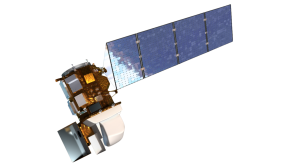

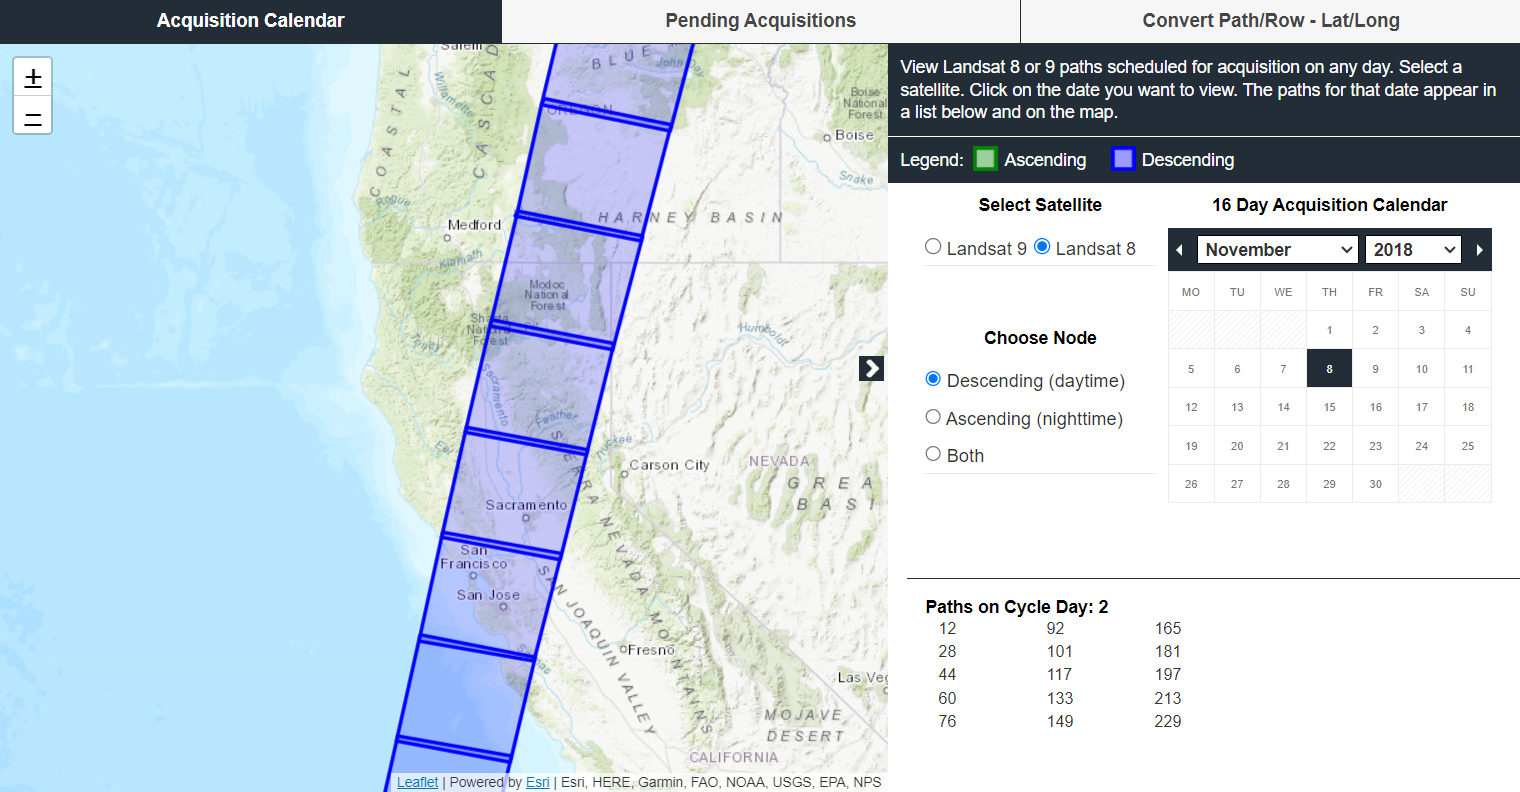

In [6]:
# Get the Landsat 8 satellite data (USGS Landsat 8 Level 2, Collection 2, Tier 1):
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")\
    .filterBounds(poi)\
    .filterDate(start_date, end_date)

landsat_recovery = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")\
    .filterBounds(poi)\
    .filterDate(recovery_start_date, recovery_end_date)

# How many images are being pulled in?
print('Total number of images:', landsat.size().getInfo())
print('Total number of recovery images:', landsat_recovery.size().getInfo())

# Which spectral bands are included?
landsat.first().bandNames().getInfo()
landsat_recovery.first().bandNames().getInfo()

Total number of images: 6
Total number of recovery images: 8


['SR_B1',
 'SR_B2',
 'SR_B3',
 'SR_B4',
 'SR_B5',
 'SR_B6',
 'SR_B7',
 'SR_QA_AEROSOL',
 'ST_B10',
 'ST_ATRAN',
 'ST_CDIST',
 'ST_DRAD',
 'ST_EMIS',
 'ST_EMSD',
 'ST_QA',
 'ST_TRAD',
 'ST_URAD',
 'QA_PIXEL',
 'QA_RADSAT']

In [7]:
# Add images to a list
landsat_list = landsat.toList(landsat.size())
landsat_list_recovery = landsat_recovery.toList(landsat_recovery.size())

In [8]:
# Set image parameters
vis_params = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'], #bands to display (r, g, b)
    'min': 7000,
    'max': 16000,
    'dimensions': 800 #square size in pixels
}

In [9]:
# Create an empty data container
data = []

# Loop through each image and display it
for i in range(landsat.size().getInfo()):
  # Date acquired
  date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()
  # Cloud cover
  cloud_cover = ee.Image(landsat_list.get(i)).get('CLOUD_COVER').getInfo()
  # Print image info
  print('Image #', i, date, 'Cloud cover:', cloud_cover)
  # Display image
  display(Image(url=ee.Image(landsat_list.get(i)).getThumbUrl(vis_params)))
  # Data to list
  this_data = [i, date, cloud_cover]
  # Append data
  data.append(this_data)

# Loop through each image and display it
for i in range(landsat_recovery.size().getInfo()):
  # Date acquired
  date = ee.Image(landsat_list_recovery.get(i)).get('DATE_ACQUIRED').getInfo()
  # Cloud cover
  cloud_cover = ee.Image(landsat_list_recovery.get(i)).get('CLOUD_COVER').getInfo()
  # Print image info
  print('Recovery Image #', i, date, 'Cloud cover:', cloud_cover)
  # Display image
  display(Image(url=ee.Image(landsat_list_recovery.get(i)).getThumbUrl(vis_params)))
  # Data to list
  this_data = [i, date, cloud_cover]
  # Append data
  data.append(this_data)

# Create the dataframe
df = pd.DataFrame(data, columns=['Image #', 'Date', 'Cloud cover'])

Image # 0 2018-09-05 Cloud cover: 3.1


Image # 1 2018-09-21 Cloud cover: 0


Image # 2 2018-10-07 Cloud cover: 0.05


Image # 3 2018-10-23 Cloud cover: 73.04


Image # 4 2018-11-08 Cloud cover: 11.83


Image # 5 2018-11-24 Cloud cover: 67.16


Recovery Image # 0 2018-12-10 Cloud cover: 56.09


Recovery Image # 1 2018-12-26 Cloud cover: 5.99


Recovery Image # 2 2019-01-11 Cloud cover: 80.06


Recovery Image # 3 2019-01-27 Cloud cover: 5.21


Recovery Image # 4 2019-02-28 Cloud cover: 74.26


Recovery Image # 5 2019-03-16 Cloud cover: 0.27


Recovery Image # 6 2019-04-01 Cloud cover: 99.97


Recovery Image # 7 2019-04-17 Cloud cover: 0.45


In [10]:
# Display the dataframe
df
print(df) # printing dataframe here (after trying to use jupyter-datatables, df no longer displayed as expected, even after uninstalling the libraries); actively debugging


    Image #        Date  Cloud cover
0         0  2018-09-05         3.10
1         1  2018-09-21         0.00
2         2  2018-10-07         0.05
3         3  2018-10-23        73.04
4         4  2018-11-08        11.83
5         5  2018-11-24        67.16
6         0  2018-12-10        56.09
7         1  2018-12-26         5.99
8         2  2019-01-11        80.06
9         3  2019-01-27         5.21
10        4  2019-02-28        74.26
11        5  2019-03-16         0.27
12        6  2019-04-01        99.97
13        7  2019-04-17         0.45


In [11]:
# Create a list of images to sequence by index
landsat_sequence = [0, 1, 2, 4] # ([0, 1, 2] before, [4] during)
landsat_recovery_sequence = [1, 3, 5, 7] # (after)

'''
recovery sequence times:
1 = 2018-12-26, (+32 days (inclusive)) after 2018-11-25 (Camp Fire end date),
3 = 2019-01-27, (+65 days (inclusive)),
5 = 2019-03-16, (+112 days (inclusive)),
7 = 2019-04-17, (+144 days (inclusive))
'''

'\nrecovery sequence times:\n1 = 2018-12-26, (+32 days (inclusive)) after 2018-11-25 (Camp Fire end date),\n3 = 2019-01-27, (+65 days (inclusive)),\n5 = 2019-03-16, (+112 days (inclusive)),\n7 = 2019-04-17, (+144 days (inclusive))\n'

In [12]:
# Define a region of interest with a 20 km buffer zone
roi = poi.buffer(20000) # units = meters

In [13]:
vis_params = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'], #bands to display (r, g, b)
    'min': 7000,
    'max': 16000,
    'dimensions': 800, #square size in pixels
    'region': roi, # region of interest
}

In [14]:
# Loop through each image in both sequences to gather each image and display its image #, acquisition date, and cloud cover percentage
for i in landsat_sequence:
  # When was the image acquired?
  date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()

  # Cloud cover
  cloud_cover = ee.Image(landsat_list.get(i)).get('CLOUD_COVER').getInfo()

  # Print image info
  print('Image #', i, date, 'Cloud cover:', cloud_cover)

  display(Image(url = ee.Image(landsat_list.get(i)).getThumbUrl(vis_params)))

for i in landsat_recovery_sequence:
  # When was the image acquired?
  date = ee.Image(landsat_list_recovery.get(i)).get('DATE_ACQUIRED').getInfo()

  # Cloud cover
  cloud_cover = ee.Image(landsat_list_recovery.get(i)).get('CLOUD_COVER').getInfo()

  # Print image info
  print('Recovery Image #', i, date, 'Cloud cover:', cloud_cover)

  display(Image(url = ee.Image(landsat_list_recovery.get(i)).getThumbUrl(vis_params)))


Image # 0 2018-09-05 Cloud cover: 3.1


Image # 1 2018-09-21 Cloud cover: 0


Image # 2 2018-10-07 Cloud cover: 0.05


Image # 4 2018-11-08 Cloud cover: 11.83


Recovery Image # 1 2018-12-26 Cloud cover: 5.99


Recovery Image # 3 2019-01-27 Cloud cover: 5.21


Recovery Image # 5 2019-03-16 Cloud cover: 0.27


Recovery Image # 7 2019-04-17 Cloud cover: 0.45


**Understanding NDVI**

Landsat Surface Reflectance-derived Normalized Difference Vegetation Index (NDVI) products are produced from Landsat 8-9 Operational Land Imager (OLI)/Thermal Infrared Sensor (TIRS) Collection 1 and Collection 2 scenes that have been processed to Landsat Level-2 Surface Reflectance products.

NDVI is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion:

(NIR - R) / (NIR + R)

For Landsat 8-9, NDVI = (Band 5 – Band 4) / (Band 5 + Band 4).

In [15]:
# NDVI palette: red = low vegetation, green = high vegetation
palette = ['red', 'yellow', 'green']

ndvi_params = {
    'min': 0,
    'max': 0.4,
    'dimensions': 512,
    'region': roi,
    'palette': palette
}

In [16]:
for i in landsat_sequence:
  # When was the image taken?
  date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()

  # print some information for each image in the initial sequence
  print('Image #', i, date)

  # Calculate and then display initial images NDVI
  display(Image(url=ee.Image(landsat_list.get(i)).normalizedDifference(['SR_B5', 'SR_B4']).getThumbUrl(ndvi_params)))

for i in landsat_recovery_sequence:
  # When was the image taken?
  date = ee.Image(landsat_list_recovery.get(i)).get('DATE_ACQUIRED').getInfo()

  # print some information for each image in the recovery sequence
  print('Recovery Image #', i, date)

  # Calculate and then display recovery images NDVI
  display(Image(url=ee.Image(landsat_list_recovery.get(i)).normalizedDifference(['SR_B5', 'SR_B4']).getThumbUrl(ndvi_params)))

Image # 0 2018-09-05


Image # 1 2018-09-21


Image # 2 2018-10-07


Image # 4 2018-11-08


Recovery Image # 1 2018-12-26


Recovery Image # 3 2019-01-27


Recovery Image # 5 2019-03-16


Recovery Image # 7 2019-04-17


In [17]:
# Get list of images to create an animation
# landsat_list = landsat.toList(landsat.size())
# landsat_recovery_list = landsat_recovery.toList(landsat_recovery.size())

# landsat_sequence_images = [ee.Image(landsat_list.get(i)) for i in landsat_sequence]
# landsat_recovery_sequence_images = [ee.Image(landsat_recovery_list.get(i)) for i in landsat_recovery_sequence]

# Combine the image collections
# combined_collections = landsat_sequence_images + landsat_recovery_sequence_images

# Define the NDVI visualization function
# def compute_ndvi(image):
#     ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
#     return ndvi.visualize(min=0, max=0.4, palette=['red', 'yellow', 'green'])

# Apply the NDVI function to each image
# ndvi_images = [compute_ndvi(image) for image in combined_collections]

# Define visualization parameters for the video
# videoArgs = {
#     'region': roi,
#     'crs': 'EPSG:3310',  # California Albers
#     'framesPerSecond': 1,
#     'scale': 137
# }

# Generate the URL for each image
# image_urls = [image.getThumbURL(videoArgs) for image in ndvi_images]


In [18]:
# Generate an annotated looping gif of NDVI layers over time

# Imports
# from PIL import Image, ImageDraw, ImageFont
# import requests
# from io import BytesIO
# import imageio

# Function to download and annotate images
# def download_and_annotate(url, annotation, font_path='/content/fonts/DMMono-Medium.ttf', font_size=18, color=(13, 13, 13)):
#     response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
#     draw = ImageDraw.Draw(img)

    # Define font and size
    # font = ImageFont.truetype(font_path, font_size)

    # Position for annotation (bottom-left corner)
    # position = (15, img.height - 30)

    # Add annotation
    # draw.text(position, annotation, fill=color, font=font)

    # return img

# Generate annotated images
# annotated_images = []
# dates = ['2018-09-05', '2018-09-21', '2018-10-07', '2018-11-08', '2018-12-26', '2019-01-27', '2019-03-16', '2019-04-17']

# for i, (url, date) in enumerate(zip(image_urls, dates)):
#     annotated_img = download_and_annotate(url, f"Image {i+1}: {date}")
#     annotated_images.append(annotated_img)

# Save as looping GIF
# output_path = 'annotated_animation.gif'
# annotated_images[0].save(
#     output_path,
#     save_all=True,
#     append_images=annotated_images[1:],
#     duration=1000,  # Frame duration (milliseconds)
#     loop=0  # Set loop=0 for infinite looping
# )

In [19]:
# Import Folium mapping library
import folium

# Create a map and define a starting point and zoom level
m = folium.Map(location=[lat, lon], zoom_start=10)

# Google function that extends the Folium library to add ee layers to a Folium map
def add_ee_layer(self, ee_image_object, vis_params, name):
  ''' Adds a method for displaying Earth Engine image tiles to Folium map '''
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name=name,
    overlay=True,
    control=True
  ).add_to(self)

# Add Earth Engine drawing method to Folium map
folium.Map.add_ee_layer = add_ee_layer

# Add a layer for each satellite image of interest (before and during)
for i in landsat_sequence:
  # Acquisition date
  date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()

  m.add_ee_layer(ee.Image(landsat_list.get(i)).normalizedDifference(['SR_B5', 'SR_B4']),
                 ndvi_params,
                 name=date)

# Add a layer for each recovery image of interest
for i in landsat_recovery_sequence:
  # Acquisition date
  date = ee.Image(landsat_list_recovery.get(i)).get('DATE_ACQUIRED').getInfo()
  # NDVI
  m.add_ee_layer(ee.Image(landsat_list_recovery.get(i)).normalizedDifference(['SR_B5', 'SR_B4']),
                 ndvi_params,
                 name=date)

# Add a layer control panel to the map
folium.LayerControl(collapsed=False).add_to(m)

# Display the NDVI map
m

In [20]:
m.save('landsat.html')

**Quantify the NDVI analysis visualization**

In [21]:
''' Now quantify the NDVI analysis visualization by calculating the change
in vegetation area between each image as well as the total change in vegetation
area '''

# Define NDVI threshold to classify vegetation
ndvi_threshold = 0.2

# Function to calculate NDVI and threshold it
def calculate_vegetation_area(image):
    ndvi = image.normalizedDifference(['SR_B5', 'SR_B4'])
    vegetation = ndvi.gt(ndvi_threshold)
    area = vegetation.multiply(ee.Image.pixelArea()).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=roi,
        scale=30,
        maxPixels=1e9
    )
    return area

# Superscript unicode
squared = '\u00B2'

# List to hold the area of vegetation for each image
vegetation_areas = {}
area_differences = []

# Calculate vegetation area for each image in the landsat_sequence
for idx, i in enumerate(landsat_sequence):
    image = ee.Image(landsat_list.get(i))
    area = calculate_vegetation_area(image).getInfo()
    # Extract the area value from dict and store in dictionary with key as 'Image idx'
    vegetation_areas[f'Image {idx}'] = area['nd']
    # Format area values to include commas and round to two decimal places
    formatted_area = "{:,.2f}".format(round(area['nd'], 2))
    print(f'Image {idx} vegetation area: {formatted_area} m{squared}')

# Calculate vegetation area for each image in the landsat_recovery_sequence
for idx, i in enumerate(landsat_recovery_sequence, start=len(landsat_sequence)):
    image = ee.Image(landsat_list_recovery.get(i))
    area = calculate_vegetation_area(image).getInfo()
    # Extract the area value from dict and store in dictionary with key as 'Recovery Image idx'
    vegetation_areas[f'Recovery Image {idx - len(landsat_sequence)}'] = area['nd']
    # Format area values to include commas and round to two decimal places
    formatted_area = "{:,.2f}".format(round(area['nd'], 2))
    print(f'Recovery Image {idx - len(landsat_sequence)} vegetation area: {formatted_area} m{squared}')

# Calculate the difference in  vegetation area between consecutive images
keys = list(vegetation_areas.keys())
for i in range(1, len(keys)):
    difference = vegetation_areas[keys[i]] - vegetation_areas[keys[i-1]]
    area_differences.append(difference)
    # Format difference values to include commas and round to two decimal places
    formatted_difference = "{:,.2f}".format(round(difference, 2))
    print(f'Area difference between {keys[i]} and {keys[i-1]}: {formatted_difference} m{squared}')

# Sum the differences to get the total change in  vegetation area
total_change = sum(area_differences)
# Format total change value to include commas and round to two decimal places
formatted_total_change = "{:,.2f}".format(round(total_change, 2))
print(f'Total change in vegetation area: {formatted_total_change} m{squared}')


Image 0 vegetation area: 850,329,829.55 m²
Image 1 vegetation area: 784,858,338.65 m²
Image 2 vegetation area: 601,231,348.90 m²
Image 3 vegetation area: 122,482,923.67 m²
Recovery Image 0 vegetation area: 75,317,627.64 m²
Recovery Image 1 vegetation area: 151,389,293.39 m²
Recovery Image 2 vegetation area: 274,466,394.11 m²
Recovery Image 3 vegetation area: 494,992,408.11 m²
Area difference between Image 1 and Image 0: -65,471,490.90 m²
Area difference between Image 2 and Image 1: -183,626,989.75 m²
Area difference between Image 3 and Image 2: -478,748,425.23 m²
Area difference between Recovery Image 0 and Image 3: -47,165,296.03 m²
Area difference between Recovery Image 1 and Recovery Image 0: 76,071,665.75 m²
Area difference between Recovery Image 2 and Recovery Image 1: 123,077,100.72 m²
Area difference between Recovery Image 3 and Recovery Image 2: 220,526,014.00 m²
Total change in vegetation area: -355,337,421.44 m²


In [22]:
# Create a map
m = folium.Map(location=[lat, lon], zoom_start=10)

# Google function that extends the Folium library to add ee layers to a Folium map
def add_ee_layer(self, ee_image_object, vis_params, name):
  """Adds a method for displaying Earth Engine image tiles to Folium map"""
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name=name,
    overlay=True,
    control=True
  ).add_to(self)

# Add Earth Engine drawing method to Folium
folium.Map.add_ee_layer = add_ee_layer

# Add a layer for each satellite image of interest (before and during)
for idx, i in enumerate(landsat_sequence):
  # Acquisition date
  date = ee.Image(landsat_list.get(i)).get('DATE_ACQUIRED').getInfo()
  # Retrieve formatted area using 'Image idx' as key
  formatted_area = "{:,.2f}".format(round(vegetation_areas[f'Image {idx}'], 2))
  # Add NDVI layers
  m.add_ee_layer(ee.Image(landsat_list.get(i)).normalizedDifference(['SR_B5', 'SR_B4']),
                 ndvi_params,
                 name=(f'{date} ({formatted_area} m{squared})'))

# Add a layer for each recovery image of interest
for idx, i in enumerate(landsat_recovery_sequence, start=len(landsat_sequence)):
  # Acquisition date
  date = ee.Image(landsat_list_recovery.get(i)).get('DATE_ACQUIRED').getInfo()
  # Retrieve formatted area using 'Recovery Image idx' as key
  formatted_area = "{:,.2f}".format(round(vegetation_areas[f'Recovery Image {idx - len(landsat_sequence)}'], 2))
  # Add NDVI layers
  m.add_ee_layer(ee.Image(landsat_list_recovery.get(i)).normalizedDifference(['SR_B5', 'SR_B4']),
                 ndvi_params,
                 name=(f'{date} ({formatted_area} m{squared})'))

# Add a layer control panel to the map
folium.LayerControl(collapsed=False).add_to(m)

# Display the NDVI map
m